In [1]:

library(tidyverse)
library(reshape2)
library(gridExtra)
library(data.table)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘data.table’


The following objects are masked from ‘package:reshape2’:

    dcast, melt


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [2]:
ATACseq_clustered <- read.csv('data/ATACseq_withcluster.txt', header=T)

In [3]:
linked_data <- read.table('data/ATACseq_CHiC_RNAseq_linked.txt', header=T)

In [4]:
head(ATACseq_clustered)
head(linked_data)

,chr,start,end,width,T0,T20,T60,T2H,T4H,T24H,LR,Cluster
,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,chr10,100148537,100149145,609,6.308615,5.997314,6.371118,7.022634,8.320145,8.144691,-3.96546,0
2,chr10,101161833,101162364,532,7.338236,6.947811,6.958460,6.880832,6.679306,7.082866,-1.17149,5
3,chr10,101397063,101397480,418,6.607202,6.798536,6.333778,6.111942,5.572420,5.077424,-7.06772,3
4,chr10,101442197,101442458,262,5.683413,5.564784,6.187952,6.186169,6.197164,6.004235,-1.06531,0
5,chr10,101467306,101467557,252,5.652996,6.205735,6.295447,6.137111,5.847167,5.681351,-4.30695,1
6,chr10,101495356,101495528,173,5.345845,4.133203,4.219080,4.517889,4.446034,5.220124,-1.25567,5


,ATACchr,ATACstart,ATACend,otherEndID,otherEndchr,otherEndstart,otherEndend,ID,ENSG,ENSGchr,⋯,AT1H,AT2H,AT4H,AT24H,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd
,<fct>,<int>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000099204,chr10,⋯,5.549115,5.081706,5.133666,5.469091,-7.960483e-06,5.300782,13.144099,-0.11473015,0.3875610,-0.9240688
2,chr10,100168185,100168481,94270,chr10,100168142,100171879,7,ENSG00000122873,chr10,⋯,5.549115,5.081706,5.133666,5.469091,-7.960483e-06,5.300782,7.386855,0.01408322,-0.6566466,0.3687837
3,chr10,100510838,100511373,94364,chr10,100507722,100518706,23,ENSG00000052749,chr10,⋯,9.971759,8.586541,9.457576,8.248255,-1.622436e-05,9.036950,11.681048,0.05696710,-0.7670981,0.2089518
4,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000047056,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,10.889609,0.26646359,0.5669826,0.5107519
5,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000107566,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,8.824033,0.57759985,0.4452978,-0.3354777
6,chr10,101814895,101815024,94665,chr10,101813654,101818522,76,ENSG00000052749,chr10,⋯,6.908540,6.233613,6.974758,6.509405,-4.866014e-05,6.395328,11.681048,0.77571350,0.0847067,0.2089518


In [5]:
dim(linked_data)

[1] 37819    78

In [6]:
ATACseq_idx <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H')

In [7]:
ATACseq_data_all <- unique(linked_data[,ATACseq_idx])

In [8]:
names(ATACseq_clustered) <- c('ATACchr','ATACstart','ATACend','ATACwidth',
                              'AT0','AT20','AT1H','AT2H','AT4H','AT24H','ALR','ACluster') 

In [9]:
merged_clusteredonly <- unique(merge(ATACseq_clustered, linked_data))
dim(merged_clusteredonly)

[1] 7004   81

### read ATACseq intersected with CTCF and H3K427AC. 

In [10]:

ATACseq_with_TF <- fread('data/ATACseq_peak_withCTCF_H3K27AC.bed',header=F, sep='\t')

In [11]:
head(ATACseq_with_TF)

V1,V2,V3,V4
<chr>,<int>,<int>,<chr>
chr1,984284,984405,CTCF
chr1,1040483,1040896,CTCF
chr1,1069266,1069663,CTCF
chr1,1079475,1080236,H3K27AC
chr1,1143885,1144665,H3K27AC
chr1,1157501,1158415,H3K27AC


In [12]:
names(ATACseq_with_TF) <- c('ATACchr','ATACstart','ATACend','TF')

In [13]:
#merged_data_new <- unique(merge(linked_data, ATACseq_with_TF, all=TRUE))
merged_data <- unique(merge(merged_clusteredonly, ATACseq_with_TF, all=TRUE))


In [14]:
head(merged_data)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,ATACwidth,⋯,AdistanceToTss,AENSG,ASYMBOL,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,984284,984405,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,414,⋯,-4503,ENSG00000188157,AGRN,2.380394,7.702459,10.65154,-0.8302291,-0.7455293,0.30564424,CTCF
3,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,5335,ENSG00000237330,RNF223,2.484040,6.751469,10.65154,-0.7590192,-0.5471011,0.32102761,NA
4,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,5335,ENSG00000237330,RNF223,2.484040,6.751469,12.22116,-0.5843022,-0.6690165,-0.04538888,NA
5,chr1,1069266,1069663,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
6,chr1,1079475,1080236,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,H3K27AC


In [15]:
merged_data$TF[is.na(merged_data$TF)] <- 'Others'

In [16]:
head(merged_data)

,ATACchr,ATACstart,ATACend,AT0,AT20,AT1H,AT2H,AT4H,AT24H,ATACwidth,⋯,AdistanceToTss,AENSG,ASYMBOL,Alld_ratio0,mean_atacseq,mean_gene,corr_atacseq_gene,corr_atacseq_otherEnd,corr_gene_otherEnd,TF
,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,chr1,984284,984405,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
2,chr1,1040483,1040896,7.900938,7.986564,7.931974,7.621835,7.503944,7.269499,414,⋯,-4503,ENSG00000188157,AGRN,2.380394,7.702459,10.65154,-0.8302291,-0.7455293,0.30564424,CTCF
3,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,5335,ENSG00000237330,RNF223,2.484040,6.751469,10.65154,-0.7590192,-0.5471011,0.32102761,Others
4,chr1,1068759,1068972,7.218716,6.998478,6.689556,6.772565,6.518431,6.311069,214,⋯,5335,ENSG00000237330,RNF223,2.484040,6.751469,12.22116,-0.5843022,-0.6690165,-0.04538888,Others
5,chr1,1069266,1069663,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,CTCF
6,chr1,1079475,1080236,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,H3K27AC


In [17]:
merged_data_new <- merged_data[complete.cases(merged_data),]
dim(merged_data_new)

[1] 2849   82

In [18]:
table(merged_data_new$TF)


        CTCF CTCF,H3K27AC      H3K27AC       Others 
         571           96          476         1706 

In [19]:
idx_atacseq <- c('ATACchr','ATACstart','ATACend','AT0','AT20','AT1H','AT2H','AT4H','AT24H','ACluster')
idx_atacseq_time <- c('AT0','AT20','AT1H','AT2H','AT4H','AT24H')
idx_chic <- c('baitID','otherEndID','T0','T20','T1H','T4H','T24H','ACluster')
idx_chic_time <- c('T0','T20','T1H','T4H','T24H')
idx_atacseq_time <- c('AT0','AT20','AT1H','AT2H','AT4H','AT24H')
idx_gene <- c('ENSG','ET0_a','ET20_a','ET1H_a','ET2H_a','ET4H_a','ET24H_a','ACluster')
idx_gene_time <- c('ET0_a','ET20_a','ET1H_a','ET2H_a','ET4H_a','ET24H_a')

In [20]:
data_atacseq_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_atacseq)))
data_atacseq_CTCF_uniq <- data.frame(t(scale(t(unique(data_atacseq_CTCF)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_CTCF_uniq$cluster <- data_atacseq_CTCF$ACluster
data_atacseq_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_atacseq)))
data_atacseq_other_uniq <- data.frame(t(scale(t(unique(data_atacseq_other)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_other_uniq$cluster <- data_atacseq_other$ACluster
data_atacseq_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_atacseq)))
data_atacseq_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_atacseq_H3K27AC)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_H3K27AC_uniq$cluster <- data_atacseq_H3K27AC$ACluster
data_atacseq_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_atacseq)))
data_atacseq_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_atacseq_CTCFandH3K27AC)[,idx_atacseq_time]), center=TRUE, scale=TRUE)))
data_atacseq_CTCFandH3K27AC_uniq$cluster <- data_atacseq_CTCFandH3K27AC$ACluster

In [21]:
data_chic_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_chic)))
data_chic_CTCF_uniq <- data.frame(t(scale(t(unique(data_chic_CTCF)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_CTCF_uniq$cluster <- data_chic_CTCF$ACluster
data_chic_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_chic)))
data_chic_other_uniq <- data.frame(t(scale(t(unique(data_chic_other)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_other_uniq$cluster <- data_chic_other$ACluster
data_chic_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_chic)))
data_chic_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_chic_H3K27AC)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_H3K27AC_uniq$cluster <- data_chic_H3K27AC$ACluster
data_chic_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_chic)))
data_chic_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_chic_CTCFandH3K27AC)[,idx_chic_time]), center=TRUE, scale=TRUE)))
data_chic_CTCFandH3K27AC_uniq$cluster <- data_chic_CTCFandH3K27AC$ACluster

In [22]:
data_gene_CTCF <- unique(merged_data_new%>% filter(TF %in% 'CTCF') %>% select(all_of(idx_gene)))
data_gene_CTCF_uniq <- data.frame(t(scale(t(unique(data_gene_CTCF)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_CTCF_uniq$cluster <- data_gene_CTCF$ACluster
data_gene_other <- unique(merged_data_new%>% filter(TF %in% 'Others') %>% select(all_of(idx_gene)))
data_gene_other_uniq <- data.frame(t(scale(t(unique(data_gene_other)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_other_uniq$cluster <- data_gene_other$ACluster
data_gene_H3K27AC <- unique(merged_data_new%>% filter(TF %in% 'H3K27AC') %>% select(all_of(idx_gene)))
data_gene_H3K27AC_uniq <- data.frame(t(scale(t(unique(data_gene_H3K27AC)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_H3K27AC_uniq$cluster <- data_gene_H3K27AC$ACluster
data_gene_CTCFandH3K27AC <- unique(merged_data_new%>% filter(TF %in% 'CTCF,H3K27AC') %>% select(all_of(idx_gene)))
data_gene_CTCFandH3K27AC_uniq <- data.frame(t(scale(t(unique(data_gene_CTCFandH3K27AC)[,idx_gene_time]), center=TRUE, scale=TRUE)))
data_gene_CTCFandH3K27AC_uniq$cluster <- data_gene_CTCFandH3K27AC$ACluster

In [23]:
time0 <- c('T0','T20','T1H','T2H','T4H','T24H')
time1 <- c('T0','T20','T1H','T4H','T24H')


In [24]:
head(data_chic_CTCF_uniq)

,T0,T20,T1H,T4H,T24H,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1.68338559,0.1716470,1.0026206,0.28539359,0.2237243,2
2,1.37731483,-0.3363436,0.6523636,-0.59112163,-1.1022131,1
3,0.23743110,-1.6786684,0.6419825,-0.04430572,0.8435605,1
4,-0.09962227,0.5293336,1.3737283,-0.58822777,-1.2152119,1
5,-0.23548232,1.3026075,-1.4221815,-0.10719003,0.4622464,1
6,0.90567632,1.1496955,-0.6235249,-1.18713183,-0.2447150,1


In [25]:
names(data_atacseq_CTCF_uniq) <- c(time0, 'Cluster')
names(data_atacseq_other_uniq) <- c(time0, 'Cluster')
names(data_atacseq_H3K27AC_uniq) <- c(time0, 'Cluster')
names(data_atacseq_CTCFandH3K27AC_uniq) <- c(time0, 'Cluster')
names(data_chic_CTCF_uniq) <- c(time1,'Cluster')
names(data_chic_other_uniq) <- c(time1, 'Cluster')
names(data_chic_H3K27AC_uniq) <- c(time1, 'Cluster')
names(data_chic_CTCFandH3K27AC_uniq) <- c(time1,'Cluster')
names(data_gene_CTCF_uniq) <- c(time0, 'Cluster')
names(data_gene_other_uniq) <- c(time0, 'Cluster')
names(data_gene_H3K27AC_uniq) <- c(time0, 'Cluster')
names(data_gene_CTCFandH3K27AC_uniq) <- c(time0, 'Cluster')

In [26]:
head(data_atacseq_other_uniq)

,T0,T20,T1H,T2H,T4H,T24H,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.59246144,0.3695085,-1.04120346,-0.2618096,0.3625364,-1.021493,5
2,-0.03621339,0.6450562,0.70956681,0.2403146,0.4052358,-1.963960,3
3,-0.73242568,-0.3163020,-0.83972653,-0.4823133,0.6306453,1.740122,4
5,-1.42050539,-0.8936428,0.02740562,0.2472307,0.8750349,1.164477,0
7,-0.22583322,0.5003961,1.28315245,0.5954899,-0.6410752,-1.512130,3
9,-1.15585945,-1.0898583,0.76284521,0.4895003,-0.2653048,1.258677,0


In [27]:
data_atacseq_CTCF_uniq$label <- 1:dim(data_atacseq_CTCF_uniq)[1]
data_atacseq_other_uniq$label <- 1:dim(data_atacseq_other_uniq)[1]
data_atacseq_H3K27AC_uniq$label <- 1:dim(data_atacseq_H3K27AC_uniq)[1]
data_atacseq_CTCFandH3K27AC_uniq$label <- 1:dim(data_atacseq_CTCFandH3K27AC_uniq)[1]
data_chic_CTCF_uniq$label <- 1:dim(data_chic_CTCF_uniq)[1]
data_chic_other_uniq$label <- 1:dim(data_chic_other_uniq)[1]
data_chic_H3K27AC_uniq$label <- 1:dim(data_chic_H3K27AC_uniq)[1]
data_chic_CTCFandH3K27AC_uniq$label <- 1:dim(data_chic_CTCFandH3K27AC_uniq)[1]
data_gene_CTCF_uniq$label <- 1:dim(data_gene_CTCF_uniq)[1]
data_gene_other_uniq$label <- 1:dim(data_gene_other_uniq)[1]
data_gene_H3K27AC_uniq$label <- 1:dim(data_gene_H3K27AC_uniq)[1]
data_gene_CTCFandH3K27AC_uniq$label <- 1:dim(data_gene_CTCFandH3K27AC_uniq)[1]


In [28]:
kmeans_cluster <- function(tmp_data, CLUSTER_SIZE=4){
set.seed(5)
cluster_results <- kmeans(tmp_data,centers=CLUSTER_SIZE,iter.max = 100)

cluster_ranked <- dense_rank(cluster_results$cluster)
return(cluster_ranked)
}


In [29]:
data_atacseq_CTCF_uniq$OwnCluster <- kmeans_cluster(data_atacseq_CTCF_uniq[,time0])
data_atacseq_other_uniq$OwnCluster <- kmeans_cluster(data_atacseq_other_uniq[,time0])
data_atacseq_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_atacseq_H3K27AC_uniq[,time0])
data_atacseq_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_atacseq_CTCFandH3K27AC_uniq[,time0])

In [30]:

data_chic_CTCF_uniq$OwnCluster <- kmeans_cluster(data_chic_CTCF_uniq[,time1])
data_chic_other_uniq$OwnCluster <- kmeans_cluster(data_chic_other_uniq[,time1])
data_chic_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_chic_H3K27AC_uniq[,time1])
data_chic_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_chic_CTCFandH3K27AC_uniq[,time1])


In [31]:
data_gene_CTCF_uniq$OwnCluster <- kmeans_cluster(data_gene_CTCF_uniq[,time0])
data_gene_other_uniq$OwnCluster <- kmeans_cluster(data_gene_other_uniq[,time0])
data_gene_H3K27AC_uniq$OwnCluster <- kmeans_cluster(data_gene_H3K27AC_uniq[,time0])
data_gene_CTCFandH3K27AC_uniq$OwnCluster <- kmeans_cluster(data_gene_CTCFandH3K27AC_uniq[,time0])

In [32]:
head(data_chic_CTCF_uniq)

,T0,T20,T1H,T4H,T24H,Cluster,label,OwnCluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-1.68338559,0.1716470,1.0026206,0.28539359,0.2237243,2,1,1
2,1.37731483,-0.3363436,0.6523636,-0.59112163,-1.1022131,1,2,3
3,0.23743110,-1.6786684,0.6419825,-0.04430572,0.8435605,1,3,2
4,-0.09962227,0.5293336,1.3737283,-0.58822777,-1.2152119,1,4,4
5,-0.23548232,1.3026075,-1.4221815,-0.10719003,0.4622464,1,5,1
6,0.90567632,1.1496955,-0.6235249,-1.18713183,-0.2447150,1,6,3


In [33]:
table(data_chic_CTCF_uniq$OwnCluster)


  1   2   3   4 
111 201 109 106 

In [34]:
sign_data_atacseq_CTCF_uniq <- data_atacseq_CTCF_uniq[FALSE,]
sign_data_atacseq_other_uniq <- data_atacseq_other_uniq[FALSE,]
sign_data_atacseq_H3K27AC_uniq <- data_atacseq_H3K27AC_uniq[FALSE,]
sign_data_atacseq_CTCFandH3K27AC_uniq <- data_atacseq_CTCFandH3K27AC_uniq[FALSE,]

sign_data_atacseq_CTCF_uniq <- sign(data_atacseq_CTCF_uniq[,time0])
sign_data_atacseq_CTCF_uniq$Cluster <- data_atacseq_CTCF_uniq$Cluster
sign_data_atacseq_other_uniq <- sign(data_atacseq_other_uniq[,time0])
sign_data_atacseq_other_uniq$Cluster <- data_atacseq_other_uniq$Cluster
sign_data_atacseq_H3K27AC_uniq <- sign(data_atacseq_H3K27AC_uniq[,time0])
sign_data_atacseq_H3K27AC_uniq$Cluster <- data_atacseq_H3K27AC_uniq$Cluster
sign_data_atacseq_CTCFandH3K27AC_uniq <- sign(data_atacseq_CTCFandH3K27AC_uniq[,time0])
sign_data_atacseq_CTCFandH3K27AC_uniq$Cluster <- data_atacseq_CTCFandH3K27AC_uniq$Cluster


In [35]:
sign_data_chic_CTCF_uniq <- data_chic_CTCF_uniq[FALSE,]
sign_data_chic_other_uniq <- data_chic_other_uniq[FALSE,]
sign_data_chic_H3K27AC_uniq <- data_chic_H3K27AC_uniq[FALSE,]
sign_data_chic_CTCFandH3K27AC_uniq <- data_chic_CTCFandH3K27AC_uniq[FALSE,]

sign_data_chic_CTCF_uniq <- sign(data_chic_CTCF_uniq[,time1])
sign_data_chic_CTCF_uniq$Cluster <- data_chic_CTCF_uniq$Cluster
sign_data_chic_other_uniq <- sign(data_chic_other_uniq[,time1])
sign_data_chic_other_uniq$Cluster <- data_chic_other_uniq$Cluster
sign_data_chic_H3K27AC_uniq <- sign(data_chic_H3K27AC_uniq[,time1])
sign_data_chic_H3K27AC_uniq$Cluster <- data_chic_H3K27AC_uniq$Cluster
sign_data_chic_CTCFandH3K27AC_uniq <- sign(data_chic_CTCFandH3K27AC_uniq[,time1])
sign_data_chic_CTCFandH3K27AC_uniq$Cluster <- data_chic_CTCFandH3K27AC_uniq$Cluster


In [36]:
sign_data_gene_CTCF_uniq <- data_gene_CTCF_uniq[FALSE,]
sign_data_gene_other_uniq <- data_gene_other_uniq[FALSE,]
sign_data_gene_H3K27AC_uniq <- data_gene_H3K27AC_uniq[FALSE,]
sign_data_gene_CTCFandH3K27AC_uniq <- data_gene_CTCFandH3K27AC_uniq[FALSE,]

sign_data_gene_CTCF_uniq <- sign(data_gene_CTCF_uniq[,time0])
sign_data_gene_CTCF_uniq$Cluster <- data_gene_CTCF_uniq$Cluster
sign_data_gene_other_uniq <- sign(data_gene_other_uniq[,time0])
sign_data_gene_other_uniq$Cluster <- data_gene_other_uniq$Cluster
sign_data_gene_H3K27AC_uniq <- sign(data_gene_H3K27AC_uniq[,time0])
sign_data_gene_H3K27AC_uniq$Cluster <- data_gene_H3K27AC_uniq$Cluster
sign_data_gene_CTCFandH3K27AC_uniq <- sign(data_gene_CTCFandH3K27AC_uniq[,time0])
sign_data_gene_CTCFandH3K27AC_uniq$Cluster <- data_gene_CTCFandH3K27AC_uniq$Cluster

In [37]:
head(sign_data_atacseq_CTCF_uniq)

,T0,T20,T1H,T2H,T4H,T24H,Cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,-1,1,-1,-1,-1,1,2
2,1,-1,-1,1,1,-1,1
6,-1,-1,1,1,1,-1,1
7,-1,1,1,1,-1,-1,3
8,1,1,1,1,-1,-1,3
9,1,1,1,-1,-1,-1,3


In [38]:
sorted_atacseq_CTCF <- sign_data_atacseq_CTCF_uniq[with(sign_data_atacseq_CTCF_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_CTCF$label <- 1:dim(sorted_atacseq_CTCF)[1]
sorted_atacseq_other <- sign_data_atacseq_other_uniq[with(sign_data_atacseq_other_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_other$label <- 1:dim(sorted_atacseq_other)[1]
sorted_atacseq_H3K27AC <- sign_data_atacseq_H3K27AC_uniq[with(sign_data_atacseq_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_H3K27AC$label <- 1:dim(sorted_atacseq_H3K27AC)[1]
sorted_atacseq_CTCFandH3K27AC <- sign_data_atacseq_CTCFandH3K27AC_uniq[with(sign_data_atacseq_CTCFandH3K27AC_uniq, 
                                                                            order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_atacseq_CTCFandH3K27AC$label <- 1:dim(sorted_atacseq_CTCFandH3K27AC)[1]

sorted_chic_CTCF <- sign_data_chic_CTCF_uniq[with(sign_data_chic_CTCF_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_CTCF$label <- 1:dim(sorted_chic_CTCF)[1]
sorted_chic_other <- sign_data_chic_other_uniq[with(sign_data_chic_other_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_other$label <- 1:dim(sorted_chic_other)[1]
sorted_chic_H3K27AC <- sign_data_chic_H3K27AC_uniq[with(sign_data_chic_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_H3K27AC$label <- 1:dim(sorted_chic_H3K27AC)[1]
sorted_chic_CTCFandH3K27AC <- sign_data_chic_CTCFandH3K27AC_uniq[with(sign_data_chic_CTCFandH3K27AC_uniq, 
                                                                      order(T0,T20,T1H,T4H,T24H)), ]
sorted_chic_CTCFandH3K27AC$label <- 1:dim(sorted_chic_CTCFandH3K27AC)[1]

sorted_gene_CTCF <- sign_data_gene_CTCF_uniq[with(sign_data_gene_CTCF_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_CTCF$label <- 1:dim(sorted_gene_CTCF)[1]
sorted_gene_other <- sign_data_gene_other_uniq[with(sign_data_gene_other_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_other$label <- 1:dim(sorted_gene_other)[1]
sorted_gene_H3K27AC <- sign_data_gene_H3K27AC_uniq[with(sign_data_gene_H3K27AC_uniq, order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_H3K27AC$label <- 1:dim(sorted_gene_H3K27AC)[1]
sorted_gene_CTCFandH3K27AC <- sign_data_gene_CTCFandH3K27AC_uniq[with(sign_data_gene_CTCFandH3K27AC_uniq, 
                                                                      order(T0,T20,T1H,T4H,T24H,T2H)), ]
sorted_gene_CTCFandH3K27AC$label <- 1:dim(sorted_gene_CTCFandH3K27AC)[1]

In [39]:
head(sorted_atacseq_CTCF)
head(data_atacseq_CTCF_uniq)

,T0,T20,T1H,T2H,T4H,T24H,Cluster,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
228,-1,-1,-1,-1,-1,1,4,1
442,-1,-1,-1,-1,-1,1,4,2
46,-1,-1,-1,1,1,-1,1,3
124,-1,-1,-1,1,1,-1,0,4
452,-1,-1,-1,1,1,-1,0,5
490,-1,-1,-1,1,1,-1,1,6


,T0,T20,T1H,T2H,T4H,T24H,Cluster,label,OwnCluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,-0.24598541,1.1202024,-0.2651844,-0.9528406,-0.9785976,1.322406,2,1,1
2,0.53056963,-0.4664736,-0.1378421,0.4319520,1.2754003,-1.633606,1,2,2
6,-0.04431006,-0.6782163,0.5160796,0.9882506,0.8316924,-1.613496,1,3,2
7,-0.25148196,0.1366813,1.2834781,0.8330268,-0.4654011,-1.536303,3,4,2
8,1.00591546,0.3654248,0.3223085,0.6772222,-0.6947363,-1.676135,3,5,2
9,0.77932995,0.6990748,0.9438593,-0.5880875,-0.2152620,-1.618915,3,6,4


In [40]:
melted_atacseq_CTCF <- gather(data_atacseq_CTCF_uniq, 'time','value',-label,-Cluster)


In [41]:
idx_data1 <- c('T0', 'T20','T1H','T4H','T24H','label','OwnCluster')
idx_data2 <- c('T0', 'T20','T1H','T4H','T24H','label','OwnCluster')


In [42]:
melted_atacseq_CTCF <- gather(data_atacseq_CTCF_uniq, 'time','value',-label,-OwnCluster)
melted_atacseq_other <- gather(data_atacseq_other_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_atacseq_H3K27AC <- gather(data_atacseq_H3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)

melted_atacseq_CTCFandH3K27AC <- gather(data_atacseq_CTCFandH3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_atacseq_CTCF$category <- 'ATAC-seq'
melted_atacseq_CTCF$type <- 'CTCF'
melted_atacseq_other$category <- 'ATAC-seq'
melted_atacseq_other$type <- 'Other'
melted_atacseq_H3K27AC$category <- 'ATAC-seq'
melted_atacseq_H3K27AC$type <- 'H3K27AC'
melted_atacseq_CTCFandH3K27AC$category <- 'ATAC-seq'
melted_atacseq_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'
#### chic
melted_chic_CTCF <- gather(data_chic_CTCF_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_other <- gather(data_chic_other_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_H3K27AC <- gather(data_chic_H3K27AC_uniq[,idx_data2], 'time','value',-label,-OwnCluster)

melted_chic_CTCFandH3K27AC <- gather(data_chic_CTCFandH3K27AC_uniq[,idx_data2], 'time','value',-label,-OwnCluster)
melted_chic_CTCF$category <- 'CHi-C'
melted_chic_CTCF$type <- 'CTCF'
melted_chic_other$category <- 'CHi-C'
melted_chic_other$type <- 'Other'
melted_chic_H3K27AC$category <- 'CHi-C'
melted_chic_H3K27AC$type <- 'H3K27AC'
melted_chic_CTCFandH3K27AC$category <- 'CHi-C'
melted_chic_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### gene
melted_gene_CTCF <- gather(data_gene_CTCF_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_other <- gather(data_gene_other_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_H3K27AC <- gather(data_gene_H3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)

melted_gene_CTCFandH3K27AC <- gather(data_gene_CTCFandH3K27AC_uniq[,idx_data1], 'time','value',-label,-OwnCluster)
melted_gene_CTCF$category <- 'Gene'
melted_gene_CTCF$type <- 'CTCF'
melted_gene_other$category <- 'Gene'
melted_gene_other$type <- 'Other'
melted_gene_H3K27AC$category <- 'Gene'
melted_gene_H3K27AC$type <- 'H3K27AC'
melted_gene_CTCFandH3K27AC$category <- 'Gene'
melted_gene_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### combined melted data
melted_CTCF <- rbind(melted_atacseq_CTCF, melted_chic_CTCF, melted_gene_CTCF)
melted_other <- rbind(melted_atacseq_other, melted_chic_other, melted_gene_other)
melted_H3K27AC <- rbind(melted_atacseq_H3K27AC, melted_chic_H3K27AC, melted_gene_H3K27AC)

melted_CTCFandH3K27AC <- rbind(melted_atacseq_CTCFandH3K27AC, melted_chic_CTCFandH3K27AC, melted_gene_CTCFandH3K27AC)

melted_all <- rbind(melted_CTCF, melted_other, melted_H3K27AC, melted_CTCFandH3K27AC)
melted_all$time <- factor(melted_all$time, levels=c('T0','T20','T1H','T2H','T4H','T24H'))

In [43]:
head(sorted_atacseq_CTCF)

,T0,T20,T1H,T2H,T4H,T24H,Cluster,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
228,-1,-1,-1,-1,-1,1,4,1
442,-1,-1,-1,-1,-1,1,4,2
46,-1,-1,-1,1,1,-1,1,3
124,-1,-1,-1,1,1,-1,0,4
452,-1,-1,-1,1,1,-1,0,5
490,-1,-1,-1,1,1,-1,1,6


In [44]:
sign_idx_data2 <- c('T0', 'T20','T1H','T4H','T24H','label','Cluster')


In [45]:
sign_melted_atacseq_CTCF <- gather(sorted_atacseq_CTCF[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_other <- gather(sorted_atacseq_other[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_H3K27AC <- gather(sorted_atacseq_H3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)

sign_melted_atacseq_CTCFandH3K27AC <- gather(sorted_atacseq_CTCFandH3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_atacseq_CTCF$category <- 'ATAC-seq'
sign_melted_atacseq_CTCF$type <- 'CTCF'
sign_melted_atacseq_other$category <- 'ATAC-seq'
sign_melted_atacseq_other$type <- 'Other'
sign_melted_atacseq_H3K27AC$category <- 'ATAC-seq'
sign_melted_atacseq_H3K27AC$type <- 'H3K27AC'
sign_melted_atacseq_CTCFandH3K27AC$category <- 'ATAC-seq'
sign_melted_atacseq_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'
#### chic
sign_melted_chic_CTCF <- gather(sorted_chic_CTCF, 'time','value',-label,-Cluster)
sign_melted_chic_other <- gather(sorted_chic_other, 'time','value',-label,-Cluster)
sign_melted_chic_H3K27AC <- gather(sorted_chic_H3K27AC, 'time','value',-label,-Cluster)

sign_melted_chic_CTCFandH3K27AC <- gather(sorted_chic_CTCFandH3K27AC, 'time','value',-label,-Cluster)
sign_melted_chic_CTCF$category <- 'CHi-C'
sign_melted_chic_CTCF$type <- 'CTCF'
sign_melted_chic_other$category <- 'CHi-C'
sign_melted_chic_other$type <- 'Other'
sign_melted_chic_H3K27AC$category <- 'CHi-C'
sign_melted_chic_H3K27AC$type <- 'H3K27AC'
sign_melted_chic_CTCFandH3K27AC$category <- 'CHi-C'
sign_melted_chic_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### gene
sign_melted_gene_CTCF <- gather(sorted_gene_CTCF[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_other <- gather(sorted_gene_other[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_H3K27AC <- gather(sorted_gene_H3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)

sign_melted_gene_CTCFandH3K27AC <- gather(sorted_gene_CTCFandH3K27AC[,sign_idx_data2], 'time','value',-label,-Cluster)
sign_melted_gene_CTCF$category <- 'Gene'
sign_melted_gene_CTCF$type <- 'CTCF'
sign_melted_gene_other$category <- 'Gene'
sign_melted_gene_other$type <- 'Other'
sign_melted_gene_H3K27AC$category <- 'Gene'
sign_melted_gene_H3K27AC$type <- 'H3K27AC'
sign_melted_gene_CTCFandH3K27AC$category <- 'Gene'
sign_melted_gene_CTCFandH3K27AC$type <- 'CTCFandH3K27AC'

### combined sign_melted data
sign_melted_CTCF <- rbind(sign_melted_atacseq_CTCF, sign_melted_chic_CTCF, sign_melted_gene_CTCF)
sign_melted_other <- rbind(sign_melted_atacseq_other, sign_melted_chic_other, sign_melted_gene_other)
sign_melted_H3K27AC <- rbind(sign_melted_atacseq_H3K27AC, sign_melted_chic_H3K27AC, sign_melted_gene_H3K27AC)

sign_melted_CTCFandH3K27AC <- rbind(sign_melted_atacseq_CTCFandH3K27AC, sign_melted_chic_CTCFandH3K27AC, sign_melted_gene_CTCFandH3K27AC)

sign_melted_all <- rbind(sign_melted_CTCF, sign_melted_other, sign_melted_H3K27AC, sign_melted_CTCFandH3K27AC)
#sign_melted_all$time <- factor(sign_melted_all$time, levels=c('T0','T20','T1H','T2H','T4H','T24H'))
sign_melted_all$time <- factor(sign_melted_all$time, levels=sign_idx_data2)


In [46]:
table(sign_melted_all$type)


          CTCF CTCFandH3K27AC        H3K27AC          Other 
          5800            935           4520          16020 

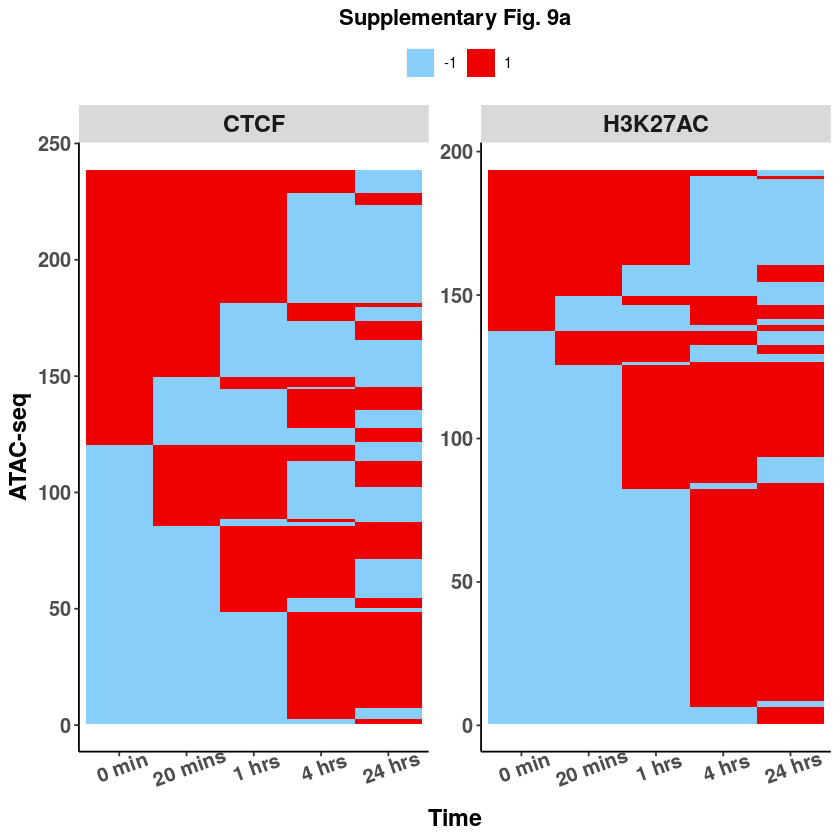

In [47]:
sign_melted_all_CTCFandH3K27AC <- subset(sign_melted_all, sign_melted_all$type %in% c('CTCF','H3K27AC'))

p_atac <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'ATAC-seq'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('ATAC-seq') + ggtitle('Supplementary Fig. 9a') + 
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')
p_atac

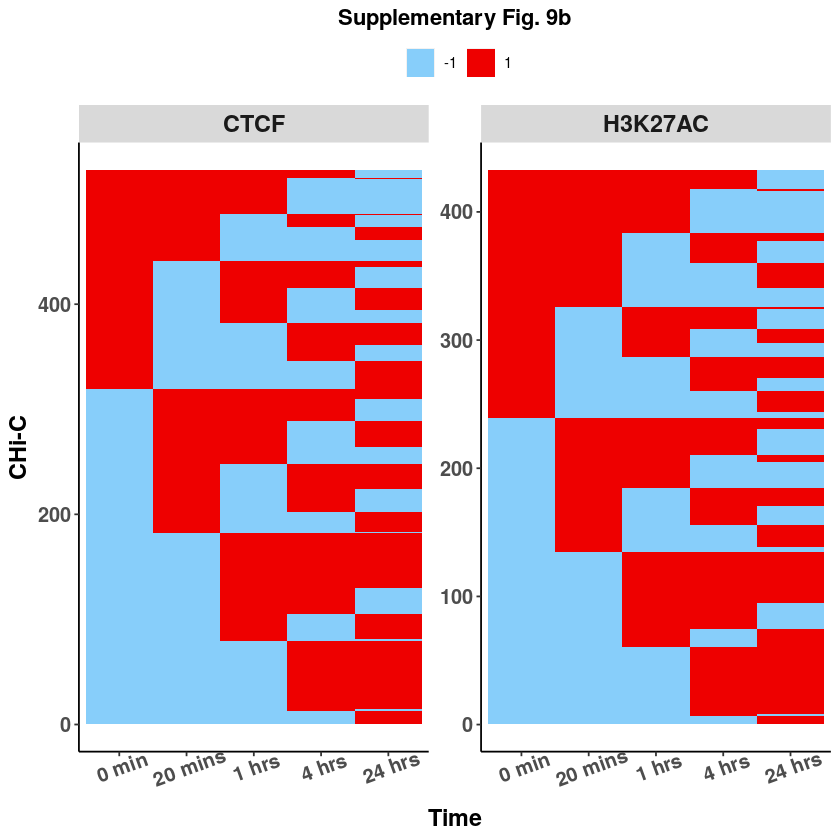

In [48]:
p_chic <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'CHi-C'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('CHi-C') +  ggtitle('Supplementary Fig. 9b') +
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')

p_chic



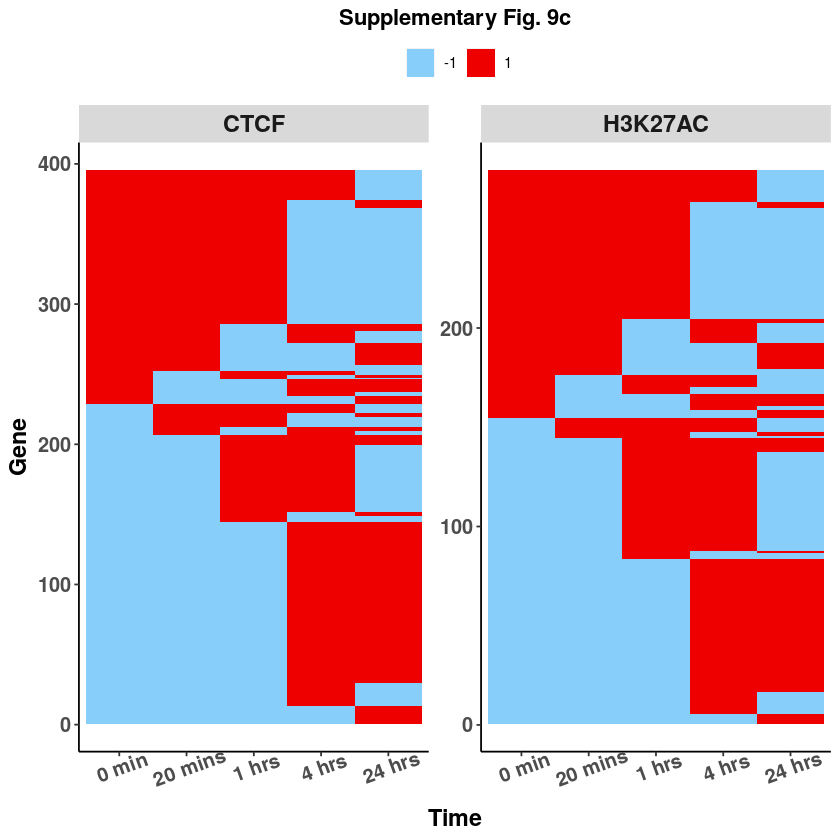

In [49]:
p_gene <- ggplot(data=subset(sign_melted_all_CTCFandH3K27AC, sign_melted_all_CTCFandH3K27AC$category %in% 'Gene'), aes(x=time, y=label, fill=factor(value), group=category)) + geom_tile(size=0.5) + 
xlab('Time') + ylab('Gene') +  ggtitle('Supplementary Fig. 9c') +
scale_fill_manual(values=c('-1'='lightskyblue','1'='red2')) +
scale_x_discrete(breaks=c("T0","T20","T1H","T4H","T24H"),
        labels=c("0 min", "20 mins", "1 hrs", "4 hrs", "24 hrs")) +
geom_tile(size=0.2) + theme( panel.background=element_blank(), plot.title = element_text(hjust = 0.5, face='bold'), 
         axis.line=element_line(), strip.text=element_text(size=8, face='bold'),
         axis.text.x=element_text(size=12, face='bold', angle=20),
                            axis.text.y=element_text(size=12, face='bold'),
                            axis.title=element_text(size=14,face="bold"), 
                           strip.text.x=element_text(size=14, face='bold'), legend.title=element_blank(), legend.position='top') +
facet_wrap(type~., nrow=1, scales='free_y')

p_gene